# Predictive Analysis of Student Depression Dataset

Problem Statements

- Bagaimana membangun model prediksi untuk mengidentifikasi mahasiswa yang mengalami depresi berdasarkan data demografi, akademik, dan gaya hidup?
- Faktor-faktor apa saja yang paling signifikan dalam memengaruhi tingkat depresi pada mahasiswa?
- Algoritma machine learning mana yang menunjukkan performa terbaik dalam mengklasifikasikan status depresi mahasiswa?

## Import Library

In [1]:
# Data handling & visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

# Visual style settings
sns.set(style='whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')

# Preprocessing & splitting
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Warning control
import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis (EDA)

In [2]:
# Mengunduh FIle
file_id = '1gCo9QoXnZzkgN4ePIAz07SRDxSIN0Wlp'
url = f'https://drive.google.com/uc?id={file_id}'

gdown.download(url, 'student_depression_dataset.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1gCo9QoXnZzkgN4ePIAz07SRDxSIN0Wlp
To: /content/student_depression_dataset.csv
100%|██████████| 2.90M/2.90M [00:00<00:00, 39.9MB/s]


'student_depression_dataset.csv'

In [3]:
# Load Dataset
df = pd.read_csv('student_depression_dataset.csv')
df.head(10)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
5,33,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,'Less than 5 hours',Healthy,PhD,No,4.0,1.0,No,0
6,52,Male,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,'7-8 hours',Healthy,BSc,No,1.0,2.0,No,0
7,56,Female,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,'Less than 5 hours',Unhealthy,'Class 12',No,0.0,1.0,Yes,0
8,59,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,'7-8 hours',Moderate,B.Ed,Yes,12.0,3.0,No,1
9,62,Male,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,'Less than 5 hours',Moderate,LLB,Yes,2.0,5.0,No,1


In [4]:
# Cek Struktur Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

ada beberapa fitur seperti sleep duration yang perlu dikonversi menjadi numerik, encode fitur kategorikal biner (yes /no), dan drop kolom tidak dibutuhkan.

In [5]:
# Statistik deskriptif
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [6]:
# Cek missing values
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [7]:
# Cek Duplikat
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [id, Gender, Age, City, Profession, Academic Pressure, Work Pressure, CGPA, Study Satisfaction, Job Satisfaction, Sleep Duration, Dietary Habits, Degree, Have you ever had suicidal thoughts ?, Work/Study Hours, Financial Stress, Family History of Mental Illness, Depression]
Index: []


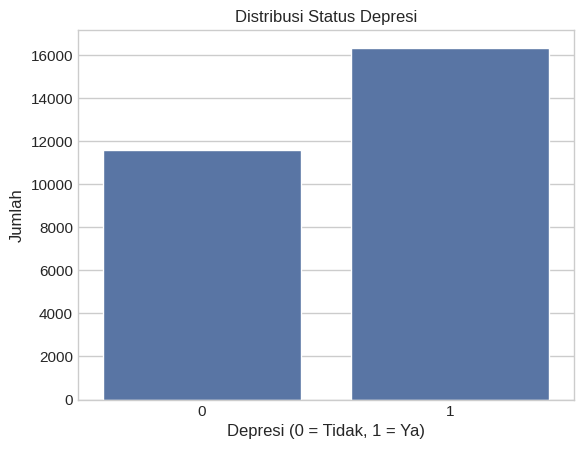

In [ ]:
# Distribusi target variabel
sns.countplot(x='Depression', data=df)
plt.title('Distribusi Status Depresi')
plt.xlabel('Depresi (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah')
plt.show()

In [8]:
print(df['Depression'].value_counts())

Depression
1    16336
0    11565
Name: count, dtype: int64


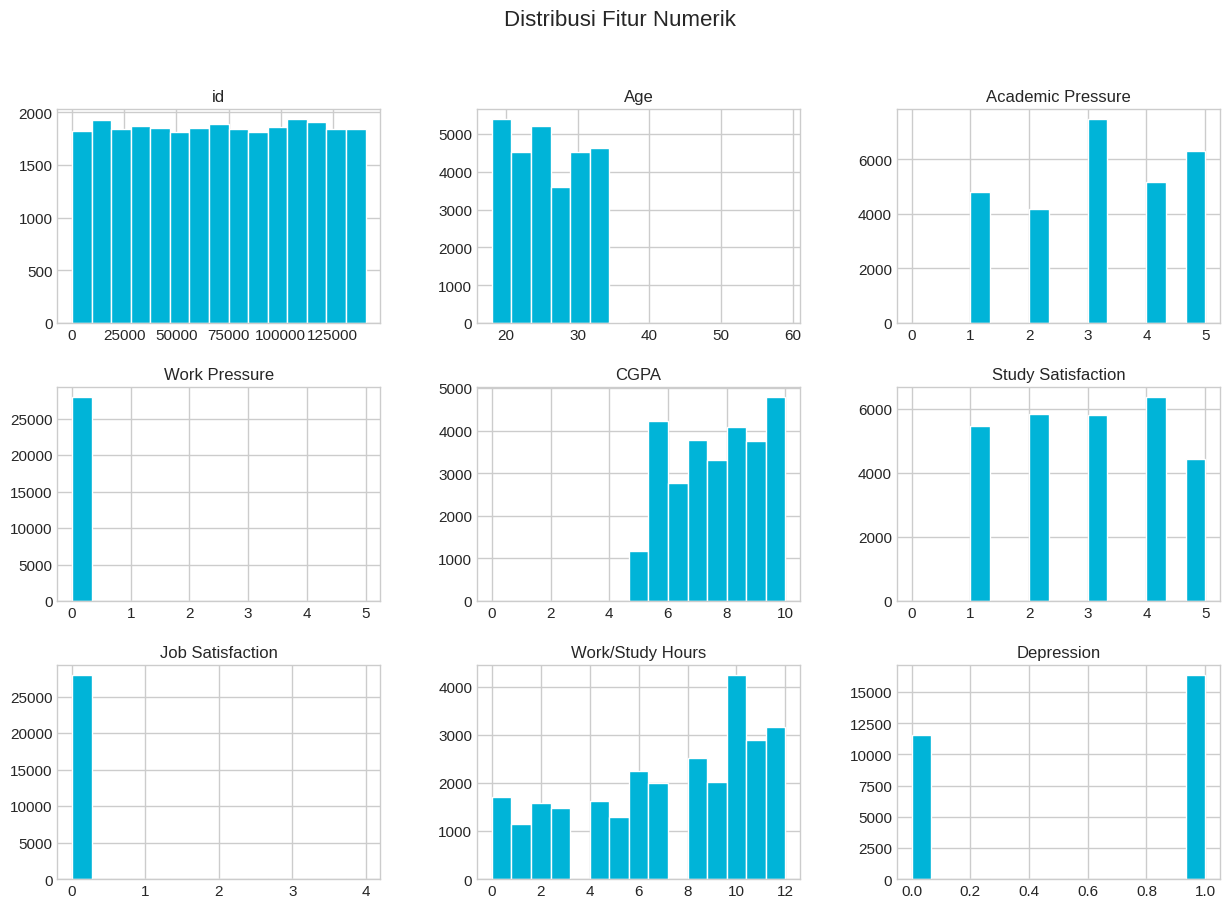

In [ ]:
# Visualisasi distribusi fitur numerik
numeric_features = df.select_dtypes(include=np.number).columns.tolist()

df[numeric_features].hist(bins=15, figsize=(15, 10), color='#00b4d8')
plt.suptitle('Distribusi Fitur Numerik', fontsize=16)
plt.show()

Fitur 'Work Pressure' dan 'Job Satisfaction' nampak hanya ada value di angka nol. Hal tersebut terjadi antara memang mahasiswa tidak ada yang melakukan pekerjaan atau ada nilai selain nol dengan frekuensi sangat kecil sehingga tidak terlihat jelas dalam grafik. Kemudian dilakukan pemeriksaan nilai unik.

In [ ]:
print(df['Work Pressure'].unique())
print(df['Job Satisfaction'].unique())

[0. 5. 2.]
[0. 3. 4. 2. 1.]


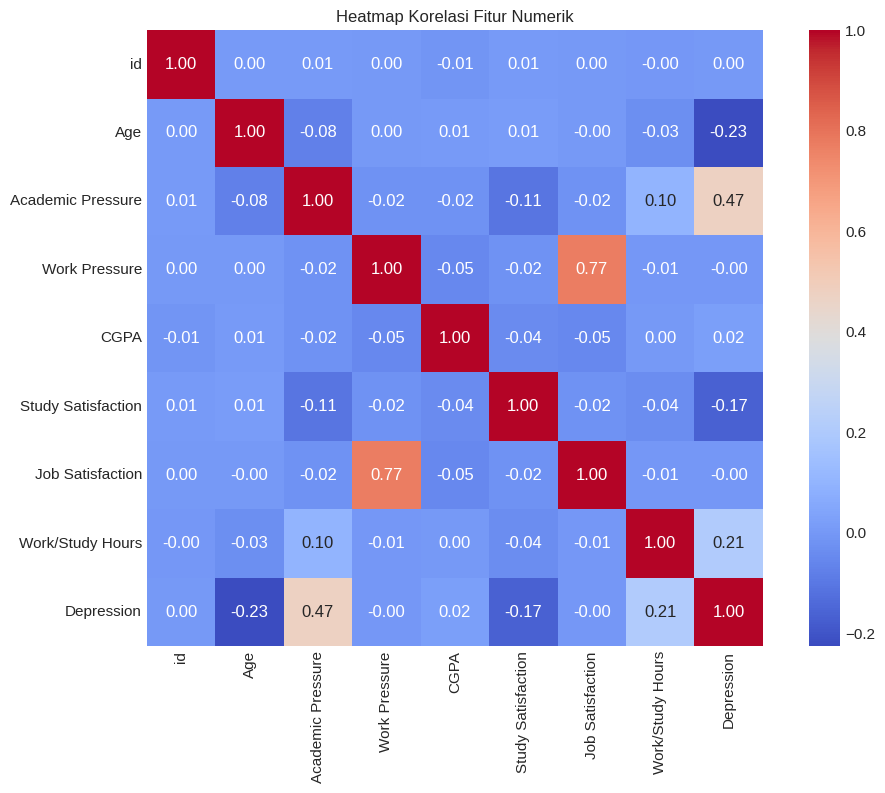

In [ ]:
# Korelasi antar fitur numerik
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

Heatmap di atas menunjukkan seberapa besar nilai korelasi atau hubungan antara dua fitur numerik. Fitur dengan korelasi cukup kuat ditunjukkan antara 'Academic Pressure' dan 'Depression' dengan arah positif. Dengan kata lain, semakin tinggi atau besar tekanan akademik, maka kemungkinan depresi juga akan meningkat. Hal tersebut sejalan dengan konsep atau teori.

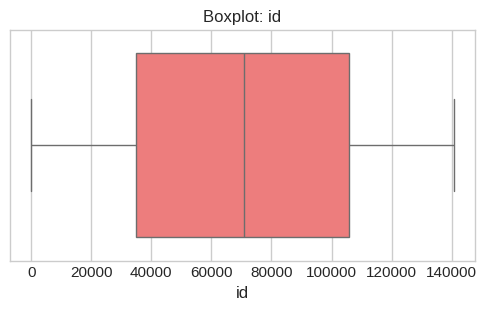

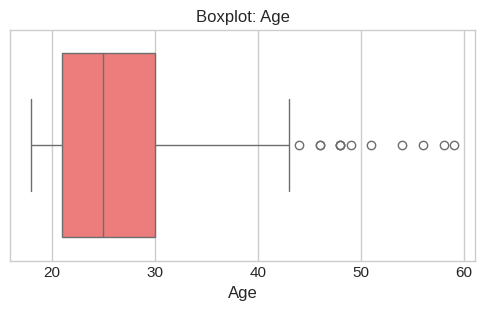

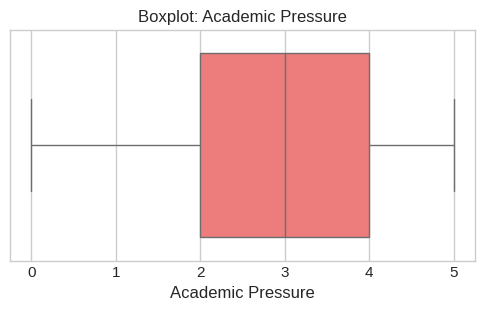

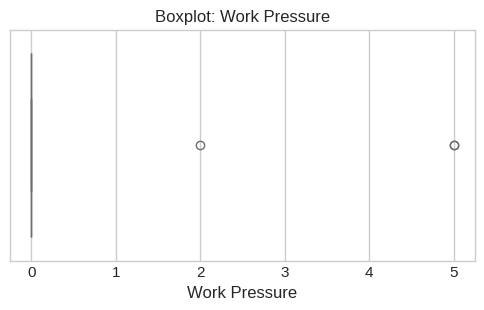

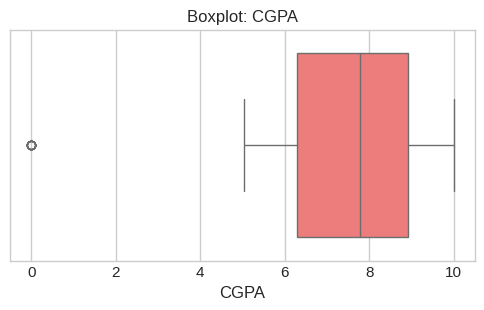

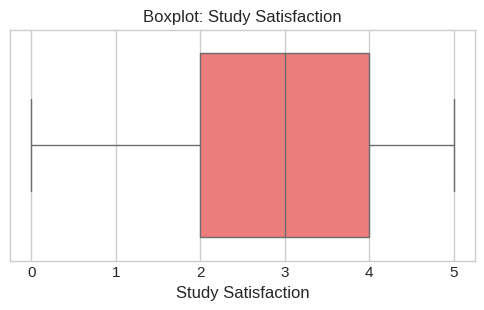

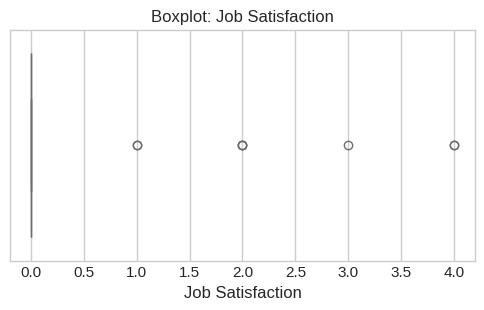

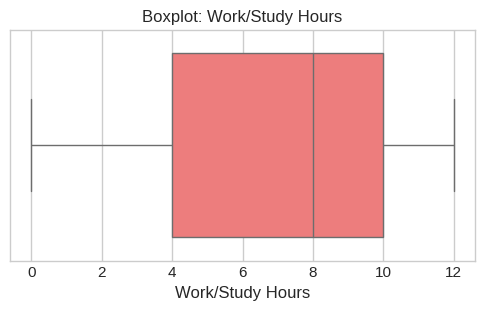

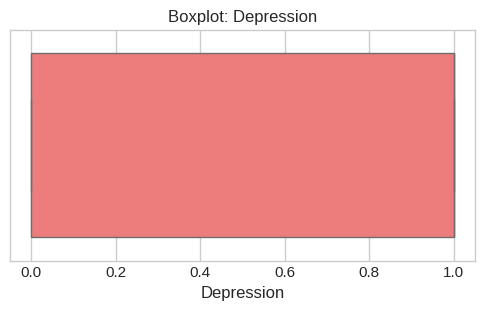

In [ ]:
# Boxplot untuk deteksi outlier
for col in numeric_features:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col], color='#ff6b6b')
    plt.title(f'Boxplot: {col}')
    plt.show()

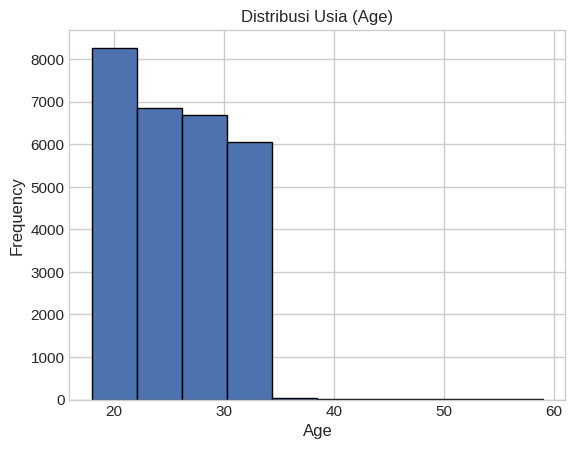

In [ ]:
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.title('Distribusi Usia (Age)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Dari hasil visualisasi dengan boxplot dan histogram, terdapat beberapa nilai outlier pada variabel Age yang tampak cukup mencolok. Namun, setelah analisis lanjutan dan mempertimbangkan konteks data, nilai-nilai tersebut tetap dipertahankan dalam dataset. Hal ini dikarenakan terdapat mahasiswa yang memulai pendidikan tinggi di usia yang relatif lebih tua (di atas 24 tahun), sehingga keberadaan nilai ekstrim ini merepresentasikan kondisi nyata di lapangan dan bukan kesalahan pengukuran atau input data. Oleh karena itu, outlier ini tidak dihapus untuk menjaga integritas dan keaslian data.

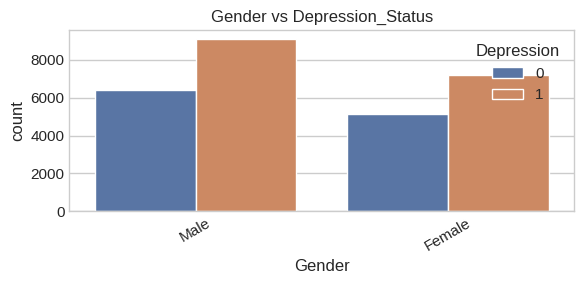

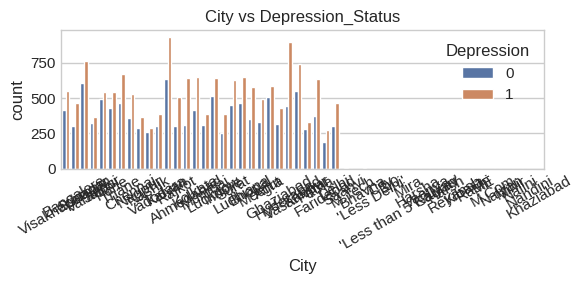

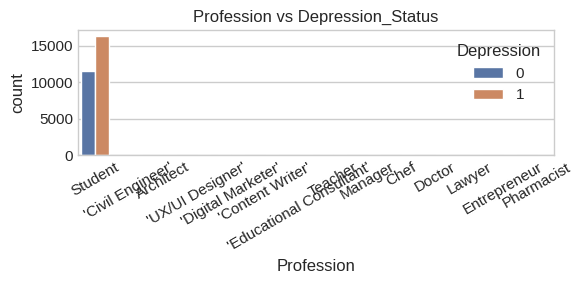

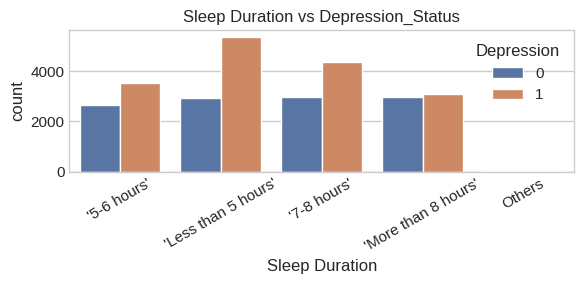

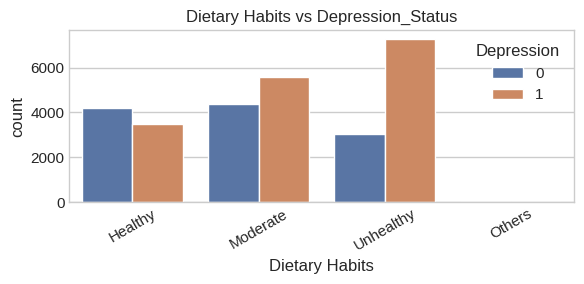

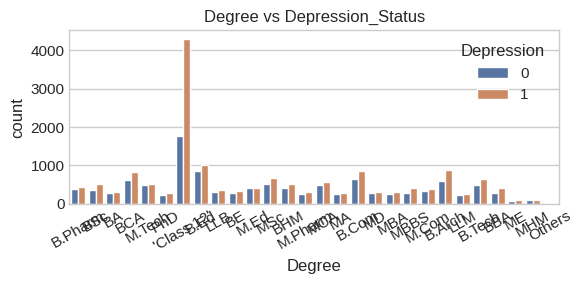

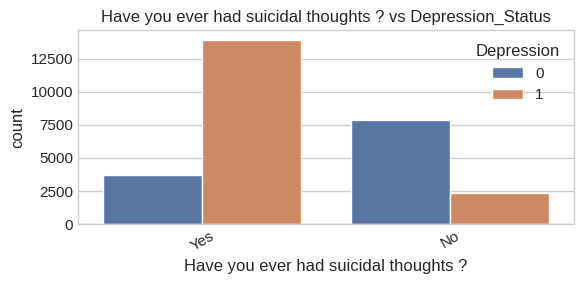

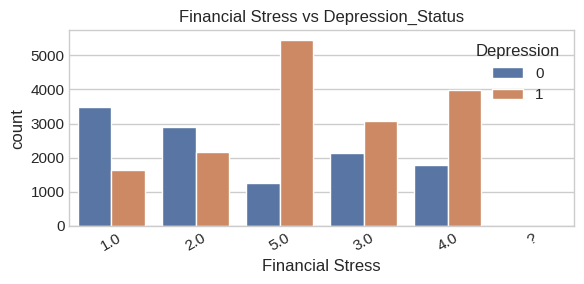

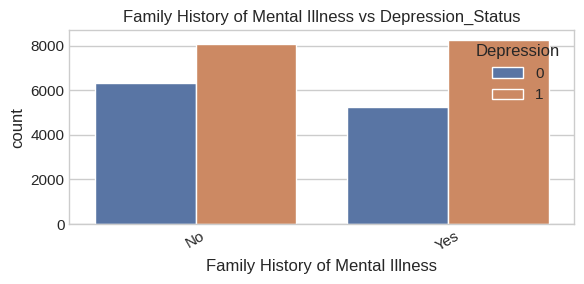

In [ ]:
# Visualisasi fitur kategorikal terhadap target
categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col, hue='Depression')
    plt.title(f'{col} vs Depression_Status')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

## Data Preparation

In [ ]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
print(df['Profession'].unique())
print(df['Profession'].value_counts())

['Student' "'Civil Engineer'" 'Architect' "'UX/UI Designer'"
 "'Digital Marketer'" "'Content Writer'" "'Educational Consultant'"
 'Teacher' 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
Profession
Student                     27870
Architect                       8
Teacher                         6
'Digital Marketer'              3
Chef                            2
'Content Writer'                2
Pharmacist                      2
Doctor                          2
'UX/UI Designer'                1
'Civil Engineer'                1
Manager                         1
'Educational Consultant'        1
Lawyer                          1
Entrepreneur                    1
Name: count, dtype: int64


Fitur yang dianggap tidak relevan sebagai penyebab depresi, fitur dengan low variance, dan berpotensi mirip dengan label akan dihapus.

In [ ]:
# Drop Fitur yang dianggap tidak relevan
df.drop([
    'id',
    'City',
    'Profession',
    'Job Satisfaction',
    'Have you ever had suicidal thoughts ?',
    'Degree'], axis=1, inplace=True)

In [ ]:
df.head()

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,0.0,8.97,2.0,'5-6 hours',Healthy,3.0,1.0,No,1
1,Female,24.0,2.0,0.0,5.90,5.0,'5-6 hours',Moderate,3.0,2.0,Yes,0
2,Male,31.0,3.0,0.0,7.03,5.0,'Less than 5 hours',Healthy,9.0,1.0,Yes,0
3,Female,28.0,3.0,0.0,5.59,2.0,'7-8 hours',Moderate,4.0,5.0,Yes,1
4,Female,25.0,4.0,0.0,8.13,3.0,'5-6 hours',Moderate,1.0,1.0,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender                            27901 non-null  object 
 1   Age                               27901 non-null  float64
 2   Academic Pressure                 27901 non-null  float64
 3   Work Pressure                     27901 non-null  float64
 4   CGPA                              27901 non-null  float64
 5   Study Satisfaction                27901 non-null  float64
 6   Sleep Duration                    27901 non-null  object 
 7   Dietary Habits                    27901 non-null  object 
 8   Work/Study Hours                  27901 non-null  float64
 9   Financial Stress                  27901 non-null  object 
 10  Family History of Mental Illness  27901 non-null  object 
 11  Depression                        27901 non-null  int64  
dtypes: f

In [ ]:
print(df['Financial Stress'].value_counts())

Financial Stress
5.0    6715
4.0    5775
3.0    5226
1.0    5121
2.0    5061
?         3
Name: count, dtype: int64


In [ ]:
# Ganti '?' dengan modus
mode_val = df.loc[df['Financial Stress'] != '?', 'Financial Stress'].mode()[0]
df['Financial Stress'] = df['Financial Stress'].replace('?', mode_val)
df['Financial Stress'] = df['Financial Stress'].astype(float)

In [ ]:
# Ubah Tipe Data
df['Financial Stress'] = df['Financial Stress'].astype(float)

In [ ]:
# Membersihkan string dari spasi dan tanda kutip
df['Gender'] = df['Gender'].str.strip().str.replace("'", "")
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].str.strip().str.replace("'", "")
df['Sleep Duration'] = df['Sleep Duration'].str.strip().str.replace("'", "")
df['Dietary Habits'] = df['Dietary Habits'].str.strip().str.replace("'", "")

In [ ]:
# Encode Fitur Kategorikal

# Label Encoding
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})

# Ordinal Encoding
sleep_map = {
    'Less than 5 hours': 0,
    '5-6 hours': 1,
    '7-8 hours': 2,
    'More than 8 hours': 3,
    'Others': 4
}
df['Sleep Duration'] = df['Sleep Duration'].replace(sleep_map)

diet_map = {
    'Unhealthy': 0,
    'Moderate': 1,
    'Healthy': 2,
    'Others': 3
}
df['Dietary Habits'] = df['Dietary Habits'].replace(diet_map)

In [ ]:
df.head()

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,5.0,0.0,8.97,2.0,1,2,3.0,1.0,0,1
1,1,24.0,2.0,0.0,5.90,5.0,1,1,3.0,2.0,1,0
2,0,31.0,3.0,0.0,7.03,5.0,0,2,9.0,1.0,1,0
3,1,28.0,3.0,0.0,5.59,2.0,2,1,4.0,5.0,1,1
4,1,25.0,4.0,0.0,8.13,3.0,1,1,1.0,1.0,0,0


In [ ]:
num_cols = ['Age', 'CGPA', 'Work/Study Hours']  # murni numerik

ordinal_cols = ['Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Financial Stress', 'Sleep Duration'] # bisa juga dikategorikan sebagai numerik ordinal

cat_cols = ['Gender', 'Dietary Habits', 'Family History of Mental Illness']


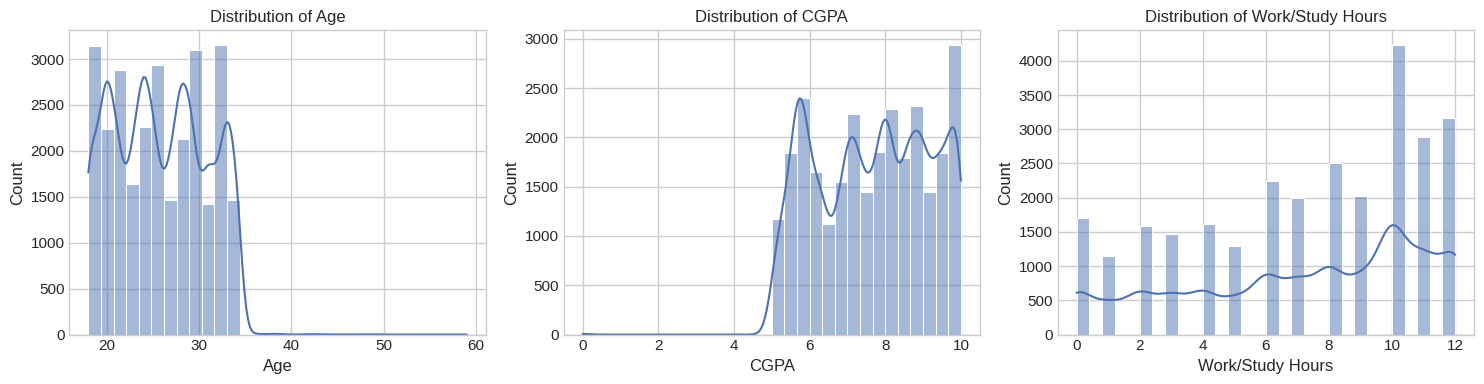

In [ ]:
plt.figure(figsize=(15, 4))

for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [ ]:
# Normalisasi / Standarisasi Fitur Numerik
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
df.head()

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,1.463165,5.0,0.0,0.893393,2.0,1,2,-1.121213,1.0,0,1
1,1,-0.371474,2.0,0.0,-1.194076,5.0,1,1,-1.121213,2.0,1,0
2,0,1.055467,3.0,0.0,-0.425724,5.0,0,2,0.497095,1.0,1,0
3,1,0.443921,3.0,0.0,-1.404862,2.0,2,1,-0.851495,5.0,1,1
4,1,-0.167625,4.0,0.0,0.322229,3.0,1,1,-1.660650,1.0,0,0


In [ ]:
# Memisahkan variabel atau fitur
X = df.drop('Depression', axis=1)
y = df['Depression']

## Modelling

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluation

=== Logistic Regression ===


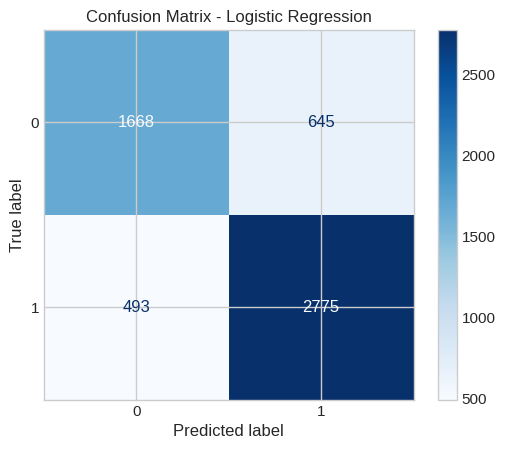

=== Random Forest ===


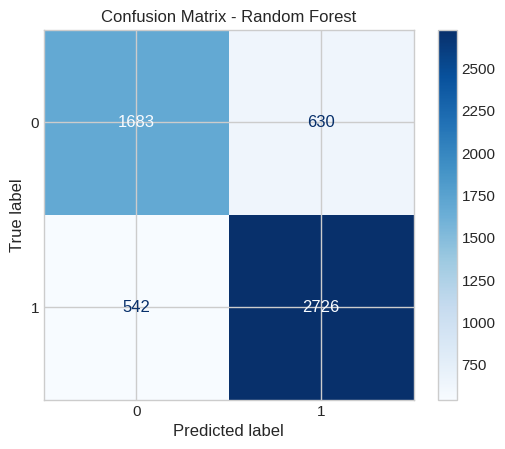

                 Model  Accuracy  Precision (macro avg)  Recall (macro avg)  \
0  Logistic Regression  0.796094               0.791634            0.785142   
1        Random Forest  0.790002               0.784341            0.780888   

   F1-score (macro avg)  
0              0.787743  
1              0.782402  


In [ ]:
def evaluate_model(model, X_test, y_test, name="Model"):
    print(f"=== {name} ===")
    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    result = {
        "Model": name,
        "Accuracy": report["accuracy"],
        "Precision (macro avg)": report["macro avg"]["precision"],
        "Recall (macro avg)": report["macro avg"]["recall"],
        "F1-score (macro avg)": report["macro avg"]["f1-score"]
    }
    return pd.DataFrame([result])

results = pd.concat([
    evaluate_model(lr, X_test, y_test, "Logistic Regression"),
    evaluate_model(rf, X_test, y_test, "Random Forest")
], ignore_index=True)

print(results)

=== Tuning Logistic Regression ===
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params for Logistic Regression: {'C': np.float64(0.017787658410143285), 'penalty': 'l2', 'solver': 'saga'}
=== Logistic Regression (Tuned) ===


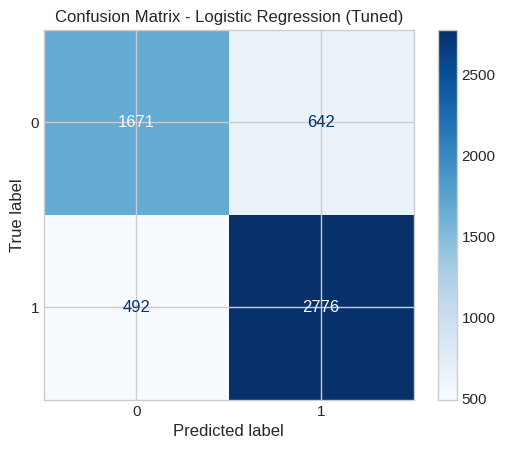

=== Tuning Random Forest ===
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params for Random Forest: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}
=== Random Forest (Tuned) ===


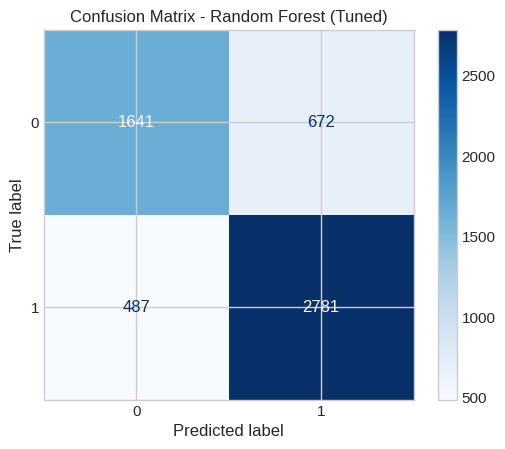


=== Final Tuned Model Evaluation ===
                         Model  Accuracy  Precision (macro avg)  \
0  Logistic Regression (Tuned)  0.796811               0.792355   
1        Random Forest (Tuned)  0.792331               0.788267   

   Recall (macro avg)  F1-score (macro avg)  \
0            0.785944              0.788520   
1            0.780224              0.783289   

                                         Best Params  
0  {'C': 0.017787658410143285, 'penalty': 'l2', '...  
1  {'n_estimators': 50, 'min_samples_split': 5, '...  


In [ ]:
# Hyperparameter Tuning untuk Logistic Regression dan Random Forest
param_grids = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'C': uniform(0.01, 10),
            'solver': ['lbfgs', 'saga'],
            'penalty': ['l2']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]
        }
    }
}

def randomized_tune_and_evaluate(param_grids, X_train, y_train, X_test, y_test, n_iter):
    all_results = []

    for name, mp in param_grids.items():
        print(f"=== Tuning {name} ===")
        rsearch = RandomizedSearchCV(
            estimator=mp['model'],
            param_distributions=mp['params'],
            n_iter=n_iter,
            scoring='f1_macro',
            cv=5,
            n_jobs=-1,
            verbose=2,
            random_state=42
        )
        rsearch.fit(X_train, y_train)
        print(f"Best params for {name}: {rsearch.best_params_}")

        # Evaluasi model terbaik
        eval_df = evaluate_model(rsearch.best_estimator_, X_test, y_test, f"{name} (Tuned)")
        eval_df["Best Params"] = [rsearch.best_params_]
        all_results.append(eval_df)

    final_results = pd.concat(all_results, ignore_index=True)
    print("\n=== Final Tuned Model Evaluation ===")
    print(final_results)

    return final_results

final_tuned_results = randomized_tune_and_evaluate(param_grids, X_train, y_train, X_test, y_test, n_iter=20)

## Conclusion

Hasil tuning menunjukkan parameter terbaik untuk masing-masing model sebagai berikut:

- Logistic Regression
  - `C`: 0.017787658410143285
  - `penalty`: `'l2'`
  - `solver`: `'saga'`

- Random Forest
  - `n_estimators`: 50  
  - `min_samples_split`: 5  
  - `min_samples_leaf`: 1  
  - `max_depth`: 10  
  - `bootstrap`: `True`



Hasil Evaluasi Sebelum Tuning

| Model               | Accuracy | Precision (macro avg) | Recall (macro avg) | F1-score (macro avg) |
|---------------------|----------|------------------------|---------------------|----------------------|
| Logistic Regression | 0.796094 | 0.791634               | 0.785142            | 0.787743             |
| Random Forest       | 0.790002 | 0.784341               | 0.780888            | 0.782402             |

Hasil Evaluasi Setelah Tuning

| Model                    | Accuracy | Precision (macro avg) | Recall (macro avg) | F1-score (macro avg) |
|--------------------------|----------|------------------------|---------------------|----------------------|
| Logistic Regression (Tuned) | 0.796811 | 0.792355               | 0.785944            | 0.788520             |
| Random Forest (Tuned)       | 0.792331 | 0.788267               | 0.780224            | 0.783289             |

- Tuning meningkatkan performa model, meskipun tidak signifikan secara drastis.
- Logistic Regression mengalami sedikit peningkatan pada semua metrik, sedangkan Random Forest mendapatkan sedikit peningkatan pada precision dan f1-score.
- Sehingga dalam kasus ini, algoritma Logistic Regression memiliki performa paling baik dalam mengklasifikasikan status depresi mahasiswa
